In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Text(0,0.5,"'sales")

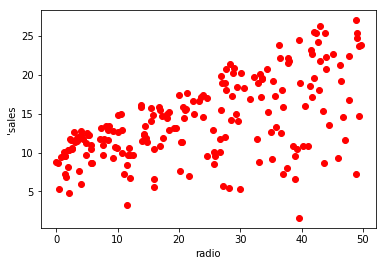

In [12]:
x_data=data['radio'].values
y_data=data['sales'].values
plt.plot(x_data,y_data,'ro')
plt.xlabel("radio")
plt.ylabel("'sales")

In [14]:
def predict_sales(radio, weight, bias):
    return weight*radio + bias

def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)
    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print ("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history



In [35]:
weight=0.0    
bias=0.0
cost_function(x_data, y_data, weight, bias)

223.71625000000003

In [36]:
weight,bias,cost_history=train(x_data, y_data, weight, bias,0.001, 30)

iter=0    weight=0.74    bias=0.0280    cost=9.2e+01
iter=10    weight=0.49    bias=0.0737    cost=4.3e+01
iter=20    weight=0.48    bias=0.1268    cost=4.2e+01


In [37]:
cost_function(x_data, y_data, weight, bias)

42.16979129867877

In [39]:
iter=[]
for i in range(len(cost_history)):
    iter.append(i)

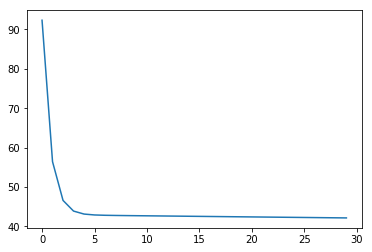

In [40]:
plt.plot(iter,cost_history)

Text(0,0.5,"'sales")

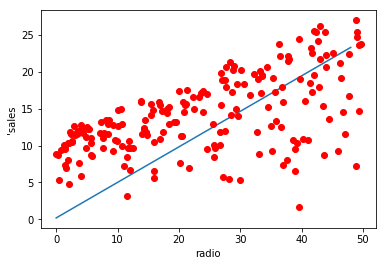

In [46]:
line_x=[]
line_y=[]
for i in range(int(max(x_data))):
    line_y.append( predict_sales(i, weight, bias))
    line_x.append(i)
plt.plot(line_x,line_y)
x_data=data['radio'].values
y_data=data['sales'].values
plt.plot(x_data,y_data,'ro')
plt.xlabel("radio")
plt.ylabel("'sales")